## Введение в анализ данных, ИАД-1

## НИУ ВШЭ, 2018-19 учебный год

### Домашнее задание №2

Задание выполнил(а): _Шорыгина Татьяна_

### Общая информация

__Дата выдачи:__ 25.02.2019

__Дедлайн:__ 23:59 5.03.2019

### О задании

В данном домашнем задании вы реализуете линейную регрессию своими руками и сравните её с версией в scikit-learn.

### Оценивание и штрафы

За сдачу задания позже срока на итоговую оценку за задание накладывается штраф в размере 1 балл в день, но получить отрицательную оценку нельзя.

__Внимание!__ Домашнее задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов.

### Формат сдачи

__Стирать условия нельзя!__

Загрузка файлов с решениями происходит в системе [Anytask](https://anytask.org/).

Формат названия файла: homework_02_Фамилия_Имя.ipynb

## Часть 1. Обыкновенная линейная регрессия

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import cm
%matplotlib inline

### 1 (4 балла). 
На семинаре мы начали реализовывать класс линейной регрессии; теперь необходимо его закончить. 

In [2]:
class LinReg():
    def __init__(self, step_size=0.0001, num_steps=200, eps=1e-6):
        self.w = None # веса
        self.step_size = step_size
        self.num_steps = num_steps
        self.eps = eps
    
    def __calc_grad(self, X_train, y_train):
        tempp = 2*(np.dot(X_train, self.w) - y_train)
        t = tempp.reshape(1, tempp.shape[0])
        t1 = (np.dot(t, X_train))
        return (np.dot(t, X_train)).reshape(np.dot(t, X_train).shape[1], 1)
    
    def fit(self, X_train, y_train):
        y_train = y_train.reshape(y_train.shape[0], 1)
        X_train = np.append(X_train, np.ones((X_train.shape[0], 1)), axis=1)
        self.w = np.ones((X_train.shape[1], 1))
        w_backup = self.w
        #self.w = np.random.rand(X_train.shape[1], 1)
        #self.w = np.zeros((X_train.shape[1], 1))
        for i in range(self.num_steps):
            w_backup = self.w - self.step_size*self.__calc_grad(X_train, y_train)
            if np.linalg.norm(w_backup - self.w) < self.eps:
                break
            self.w = w_backup
        return self
        
    def predict(self, X_test):
        X_test = np.append(X_test, np.ones((X_test.shape[0], 1)), axis=1)
        return np.dot(X_test, self.w)

### 2 (3 балла). 
Проверим корректность работы класса на датасете Boston Housing. 
* Загрузите его из sklearn
* Проведите предобработку данных(нормализация вещественных признаков, one-hot encoding категориальных)
* Разделите на обучение и контроль в соотношении 80:20 с random_seed 42 (самый популярный в прошлом задании)
* Обучите собственную реализацию регрессии и сравните по метрикам MAE и RMSE с LinearRegression из sklearn.

In [3]:
from sklearn.datasets import load_boston
data = load_boston()
df = pd.DataFrame(data['data'], columns=data['feature_names'])
df["MEDV"] = data.target
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df)

         CRIM     ZN  INDUS  CHAS     NOX     RM    AGE      DIS   RAD    TAX  \
0     0.00632   18.0   2.31   0.0  0.5380  6.575   65.2   4.0900   1.0  296.0   
1     0.02731    0.0   7.07   0.0  0.4690  6.421   78.9   4.9671   2.0  242.0   
2     0.02729    0.0   7.07   0.0  0.4690  7.185   61.1   4.9671   2.0  242.0   
3     0.03237    0.0   2.18   0.0  0.4580  6.998   45.8   6.0622   3.0  222.0   
4     0.06905    0.0   2.18   0.0  0.4580  7.147   54.2   6.0622   3.0  222.0   
5     0.02985    0.0   2.18   0.0  0.4580  6.430   58.7   6.0622   3.0  222.0   
6     0.08829   12.5   7.87   0.0  0.5240  6.012   66.6   5.5605   5.0  311.0   
7     0.14455   12.5   7.87   0.0  0.5240  6.172   96.1   5.9505   5.0  311.0   
8     0.21124   12.5   7.87   0.0  0.5240  5.631  100.0   6.0821   5.0  311.0   
9     0.17004   12.5   7.87   0.0  0.5240  6.004   85.9   6.5921   5.0  311.0   
10    0.22489   12.5   7.87   0.0  0.5240  6.377   94.3   6.3467   5.0  311.0   
11    0.11747   12.5   7.87 

Проверим, нет ли пропусков в данных:

In [4]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

Пропусков нет. Можно было бы воспользоваться нормализацией из ДЗ 1 (df["CRIM"]=(df["CRIM"] - df["CRIM"].mean())/df["CRIM"].std()), для остальных вещественных признаков аналогично), но для надежности используем z-score из scipy.

In [5]:
from scipy import stats

df["CRIM"] = stats.zscore(df["CRIM"])
df["ZN"] = stats.zscore(df["ZN"])
df["INDUS"] = stats.zscore(df["INDUS"])
df["NOX"] = stats.zscore(df["NOX"])
df["RM"] = stats.zscore(df["RM"])
df["AGE"] = stats.zscore(df["AGE"])
df["DIS"] = stats.zscore(df["DIS"])
df["RAD"] = stats.zscore(df["RAD"])
df["TAX"] = stats.zscore(df["TAX"])
df["PTRATIO"] = stats.zscore(df["PTRATIO"])
df["B"] = stats.zscore(df["B"])
df["LSTAT"] = stats.zscore(df["LSTAT"])
df["MEDV"] = stats.zscore(df["MEDV"])
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.417713,0.284830,-1.287909,0.0,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,0.159686
1,-0.415269,-0.487722,-0.593381,0.0,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,-0.101524
2,-0.415272,-0.487722,-0.593381,0.0,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,1.324247
3,-0.414680,-0.487722,-1.306878,0.0,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,1.182758
4,-0.410409,-0.487722,-1.306878,0.0,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,1.487503


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, data.target, test_size=0.2, random_state=42)

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
lr1 = LinearRegression()
lr1.fit(X_train, y_train)
print("Sklearn-реализация:\nMSE = ", mean_squared_error(y_test, lr1.predict(X_test)), "\nMAE = ", mean_absolute_error(y_test, lr1.predict(X_test)))

Sklearn-реализация:
MSE =  1.0472205856113366e-26 
MAE =  8.570050986949639e-14


In [8]:
lr = LinReg()
lr.fit(X_train, y_train)
print("Собственная реализация:\nMSE = ", mean_squared_error(y_test, lr.predict(X_test)), "\nMAE = ", mean_absolute_error(y_test, lr.predict(X_test)))

Собственная реализация:
MSE =  0.1147373454779238 
MAE =  0.1987443444664012


In [9]:
print("Разница между MSE = ", abs(mean_squared_error(y_test, lr1.predict(X_test)) - mean_squared_error(y_test, lr.predict(X_test))))
print("Разница между MAE = ", abs(mean_absolute_error(y_test, lr1.predict(X_test)) - mean_absolute_error(y_test, lr.predict(X_test))))

Разница между MSE =  0.1147373454779238
Разница между MAE =  0.1987443444663155


### 3 (3 балла). 
Линейная регрессия зачастую легко переобучается - модель необходимо штрафовать за величину весов; для этого применяют L1 и L2 регуляризацию: добавление нормы весов к функции потерь. В случае L2-регулязации функционал будет выглядеть как

$$ L = (Xw - y)^T(Xw - y) + \lambda||w||_2 $$.

Параметр $\lambda$ подбирается на отложенной выборке или по кросс-валидации.

* Реализуйте обучение линейной регрессии с L2-регуляризацией
* Найдите оптимальный с точки зрения метрики MAE коэффициент $\lambda$ (по кросс-валидации)
* Постройте график зависимости метрики на тестовой выборке от $\lambda$ (__подпишите оси__)
* Сравните результаты с Ridge регрессией из sklearn (аналогично пункту 2).

P.S. Извините, кросс-валидацию можете не искать, она не получилась.

In [10]:
class LinRegL2():
    def __init__(self, step_size=0.0001, num_steps=200, eps=1e-6, l=1):
        self.w = None # веса
        self.step_size = step_size
        self.num_steps = num_steps
        self.eps = eps
        self.l = l
    
    def __calc_grad(self, X_train, y_train): 
        tempp = 2*(np.dot(X_train, self.w) - y_train)
        t = tempp.reshape(1, tempp.shape[0])
        t1 = (np.dot(t, X_train))
        return (np.dot(t, X_train)).reshape(np.dot(t, X_train).shape[1], 1) + 2*self.w*self.l
    
    def fit(self, X_train, y_train):
        y_train = y_train.reshape(y_train.shape[0], 1)
        X_train = np.append(X_train, np.ones((X_train.shape[0], 1)), axis=1)
        self.w = np.ones((X_train.shape[1], 1))
        w_backup = self.w
        #self.w = np.random.rand(X_train.shape[1], 1)
        #self.w = np.zeros((X_train.shape[1], 1))
        for i in range(self.num_steps):
            w_backup = self.w - self.step_size*self.__calc_grad(X_train, y_train)
            if np.linalg.norm(w_backup - self.w) < self.eps:
                break
            self.w = w_backup
        return self
        
    def predict(self, X_test):
        X_test = np.append(X_test, np.ones((X_test.shape[0], 1)), axis=1)
        return np.dot(X_test, self.w)

In [11]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [12]:
l2_custom = LinRegL2()
l2_custom.fit(X_train, y_train)
MAE = print("MAE (custom) = ", mean_absolute_error(y_test, l2_custom.predict(X_test)))
l2 = Ridge()
l2.fit(X_train, y_train)
MAE = print("MAE = ", mean_absolute_error(y_test, l2.predict(X_test)))
print("Разница MAE = ", abs(mean_absolute_error(y_test, l2_custom.predict(X_test)) - mean_absolute_error(y_test, l2.predict(X_test))))

MAE (custom) =  0.23206570410271346
MAE =  0.03029111506400308
Разница MAE =  0.20177458903871037


Text(0,0.5,'MAE')

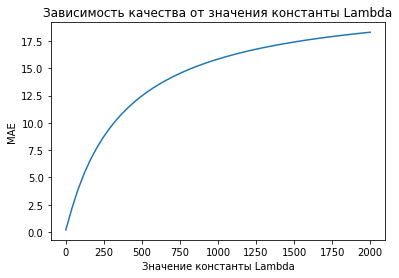

In [13]:
temp = []
steps = np.linspace(0, 2000, dtype=int)
for step in steps:
    l2_custom = LinRegL2(0.0001, 200, 1e-6, step)
    l2_custom.fit(X_train, y_train)
    temp.append(mean_absolute_error(y_test, l2_custom.predict(X_test)))
plt.plot(steps, temp)
plt.title("Зависимость качества от значения константы Lambda")
plt.xlabel("Значение константы Lambda")
plt.ylabel("MAE")

Text(0,0.5,'MSE')

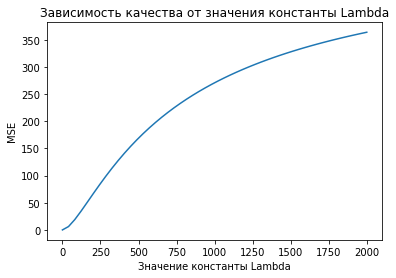

In [14]:
temp = []
steps = np.linspace(0, 2000, dtype=int)
for step in steps:
    l2_custom = LinRegL2(0.0001, 200, 1e-6, step)
    l2_custom.fit(X_train, y_train)
    temp.append(mean_squared_error(y_test, l2_custom.predict(X_test)))
plt.plot(steps, temp)
plt.title("Зависимость качества от значения константы Lambda")
plt.xlabel("Значение константы Lambda")
plt.ylabel("MSE")

### 4 (Бонус, 4 балла). 
* Реализуйте обучение линейной регрессии с L1-регуляризацией (класс RegL1)
* Проведите сравнения аналогично пункту 3 (но с Lasso вместо Ridge).

In [15]:
class LinRegL1():
    def __init__(self, step_size=0.0001, num_steps=200, eps=1e-6, l=1):
        self.w = None # веса
        self.step_size = step_size
        self.num_steps = num_steps
        self.eps = eps
        self.l = l
    
    def __calc_grad(self, X_train, y_train): 
        tempp = 2*(np.dot(X_train, self.w) - y_train)
        t = tempp.reshape(1, tempp.shape[0])
        t1 = (np.dot(t, X_train))
        return (np.dot(t, X_train)).reshape(np.dot(t, X_train).shape[1], 1) + np.sign(self.w)*self.l
    
    def fit(self, X_train, y_train):
        y_train = y_train.reshape(y_train.shape[0], 1)
        X_train = np.append(X_train, np.ones((X_train.shape[0], 1)), axis=1)
        self.w = np.ones((X_train.shape[1], 1))
        w_backup = self.w
        #self.w = np.random.rand(X_train.shape[1], 1)
        #self.w = np.zeros((X_train.shape[1], 1))
        for i in range(self.num_steps):
            w_backup = self.w - self.step_size*self.__calc_grad(X_train, y_train)
            if np.linalg.norm(w_backup - self.w) < self.eps:
                break
            self.w = w_backup
        return self
        
    def predict(self, X_test):
        X_test = np.append(X_test, np.ones((X_test.shape[0], 1)), axis=1)
        return np.dot(X_test, self.w)

In [16]:
l1_custom = LinRegL1()
l1_custom.fit(X_train, y_train)
MAE = print("MAE (custom) = ", mean_absolute_error(y_test, l1_custom.predict(X_test)))
l1 = Lasso()
l1.fit(X_train, y_train)
MAE = print("MAE = ", mean_absolute_error(y_test, l1.predict(X_test)))
print("Разница MAE = ", abs(mean_absolute_error(y_test, l1_custom.predict(X_test)) - mean_absolute_error(y_test, l1.predict(X_test))))

MAE (custom) =  0.19521056039121049
MAE =  0.6616381999781676
Разница MAE =  0.46642763958695715


### 5 (Бонус, 2 балла). 
Исследуйте для реализации регрессии с L2-регуляризацией зависимость качества на тестовой выборке (с графиками) от:
* Длины шага
* Количества шагов спуска
* Константы epsilon.

Text(0,0.5,'MAE')

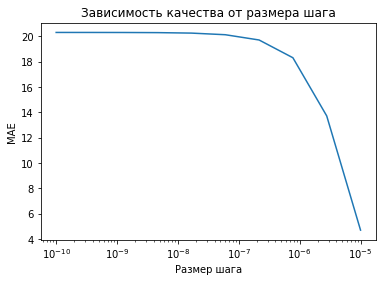

In [17]:
temp = []
steps = np.logspace(-10, -5, 10)
for step in steps:
    l2_custom = LinRegL2(step)
    l2_custom.fit(X_train, y_train)
    temp.append(mean_absolute_error(y_test, l2_custom.predict(X_test)))
plt.plot(steps, temp)
plt.xscale('log')
plt.title("Зависимость качества от размера шага")
plt.xlabel("Размер шага")
plt.ylabel("MAE")

Text(0,0.5,'MAE')

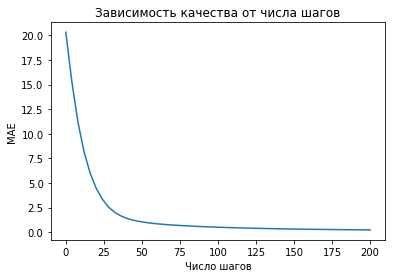

In [18]:
temp = []
steps = np.linspace(0, 200, dtype=int)
for step in steps:
    l2_custom = LinRegL2(0.0001, step, 1e-6, 1)
    l2_custom.fit(X_train, y_train)
    temp.append(mean_absolute_error(y_test, l2_custom.predict(X_test)))
plt.plot(steps, temp)
plt.title("Зависимость качества от числа шагов")
plt.xlabel("Число шагов")
plt.ylabel("MAE")

Text(0,0.5,'MAE')

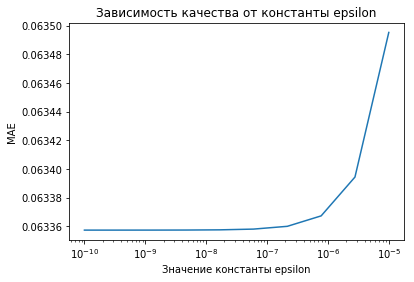

In [19]:
temp = []
steps = np.logspace(-10, -5, 10)
for step in steps:
    l2_custom = LinRegL2(0.0001, 2000000, step, 1)
    l2_custom.fit(X_train, y_train)
    temp.append(mean_absolute_error(y_test, l2_custom.predict(X_test)))
plt.plot(steps, temp)
plt.xscale('log')
plt.title("Зависимость качества от константы epsilon")
plt.xlabel("Значение константы epsilon")
plt.ylabel("MAE")

### 6 (Бонус, 0 баллов). 
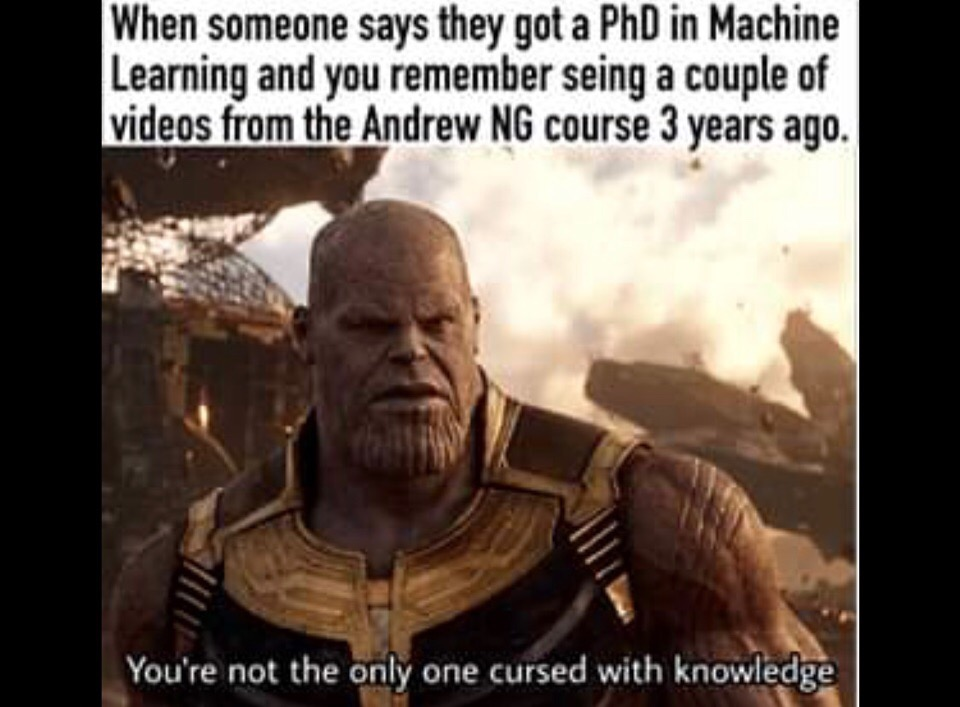

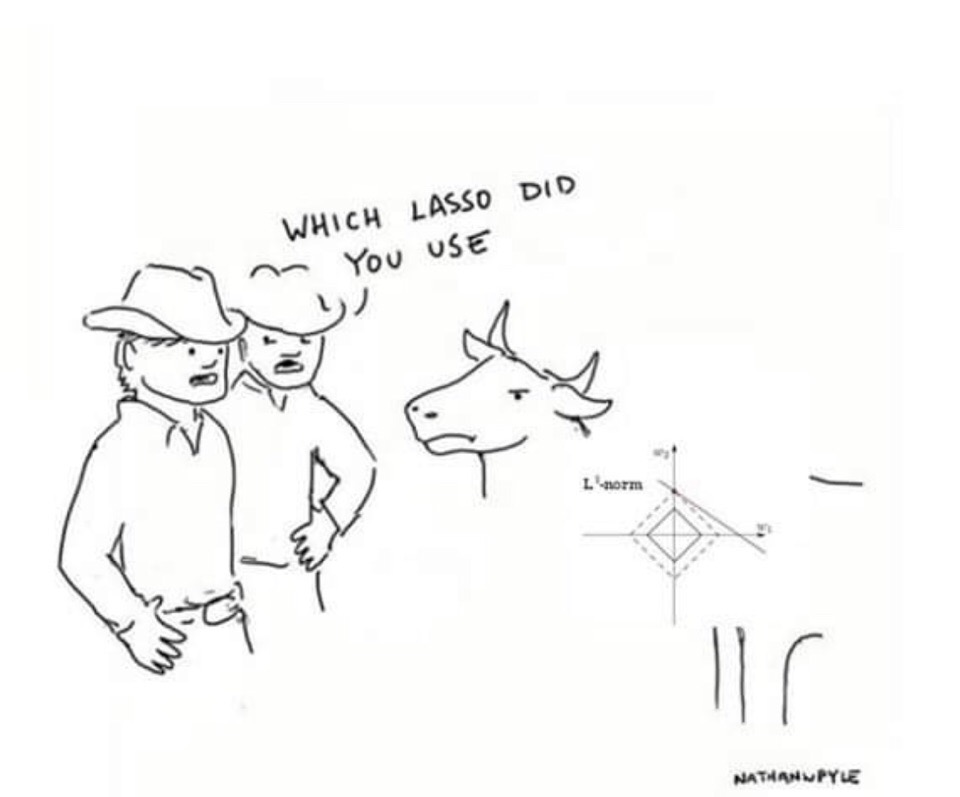